<a href="https://colab.research.google.com/github/eanchiquep/Generacion_de_nombres_con_Redes_Recurrentes/blob/master/clustering_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Clustering, es un metodo de machine learning de aprendizaje no supervisado
# Dos casos de aplicación 
# cuando sabemos cuantos grupos queremos llegar - k-means, spectral clustering
# cuando no sabemos cuantos grupos queremos llegar - Meanshift, clustering jerárquico, DBScan

In [ ]:
import pandas as pd
from sklearn.cluster import  MiniBatchKMeans # variación de KMeans util para bajo poder de procesamiento de pc
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.metrics import cluster
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks/db'
!ls

/content/drive/My Drive/Colab Notebooks/db
AGRICULTURE.csv			     Heart.csv
bicicletas-compartidas.csv	     london_merged.csv
candy.csv			     meteorite-landings.csv
CO2.csv				     meteorites_sum.csv
covid_19_data.csv		     poblacion.csv
diabetes.csv			     PUPOLATION.csv
ELECTRICAL_ENERGY.csv		     salarios.csv
FOREST.csv			     test.csv
GlobalLandTemperaturesByCountry.csv  test.xlsx
happy2017_corrupted.csv		     titanic.png
happy2017_corrupted.xlsx	     titanic-test.csv
happy2017.csv			     titanic-train.csv
happy2019.csv


In [ ]:
dataset = pd.read_csv('candy.csv')
dataset

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [ ]:
x = dataset.drop(['competitorname'], axis=1)
mb_kmeans = MiniBatchKMeans(n_clusters=3,max_iter=1000)
mb_kmeans.fit(x)
mb_kmeans.predict(x)

array([2, 2, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 2, 1, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2,
       1, 1, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 0, 1, 0, 2, 0,
       0, 0, 2, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1, 0],
      dtype=int32)

In [ ]:
dataset['group'] = mb_kmeans.predict(x)

Calculo de clusters

Text(0.5, 1.0, 'Jambu')

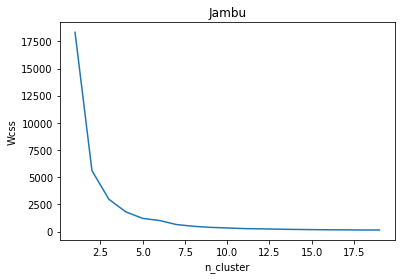

In [ ]:
wcss = []
x_values = []
for i in range(1,20):
  mb_kmeans = MiniBatchKMeans(n_clusters=i,max_iter=1000, random_state=0).fit(x)
  wcss.append(mb_kmeans.inertia_)
  x_values.append(i)
wcss

plt.plot(x_values,wcss)
plt.ylabel('Wcss')
plt.xlabel('n_cluster')
plt.title('Jambu')

In [ ]:
dataset_grouped = dataset.groupby('group').mean()
dataset_grouped

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
group,,,,,,,,,,,,
0,0.500000,0.468750,0.125000,0.156250,0.093750,0.093750,0.125000,0.343750,0.500000,0.460937,0.486781,52.673515
1,0.117647,0.617647,0.117647,0.029412,0.029412,0.000000,0.323529,0.029412,0.617647,0.422500,0.362029,36.215334
2,0.894737,0.105263,0.315789,0.421053,0.157895,0.210526,0.000000,0.473684,0.368421,0.608947,0.629947,71.581636


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


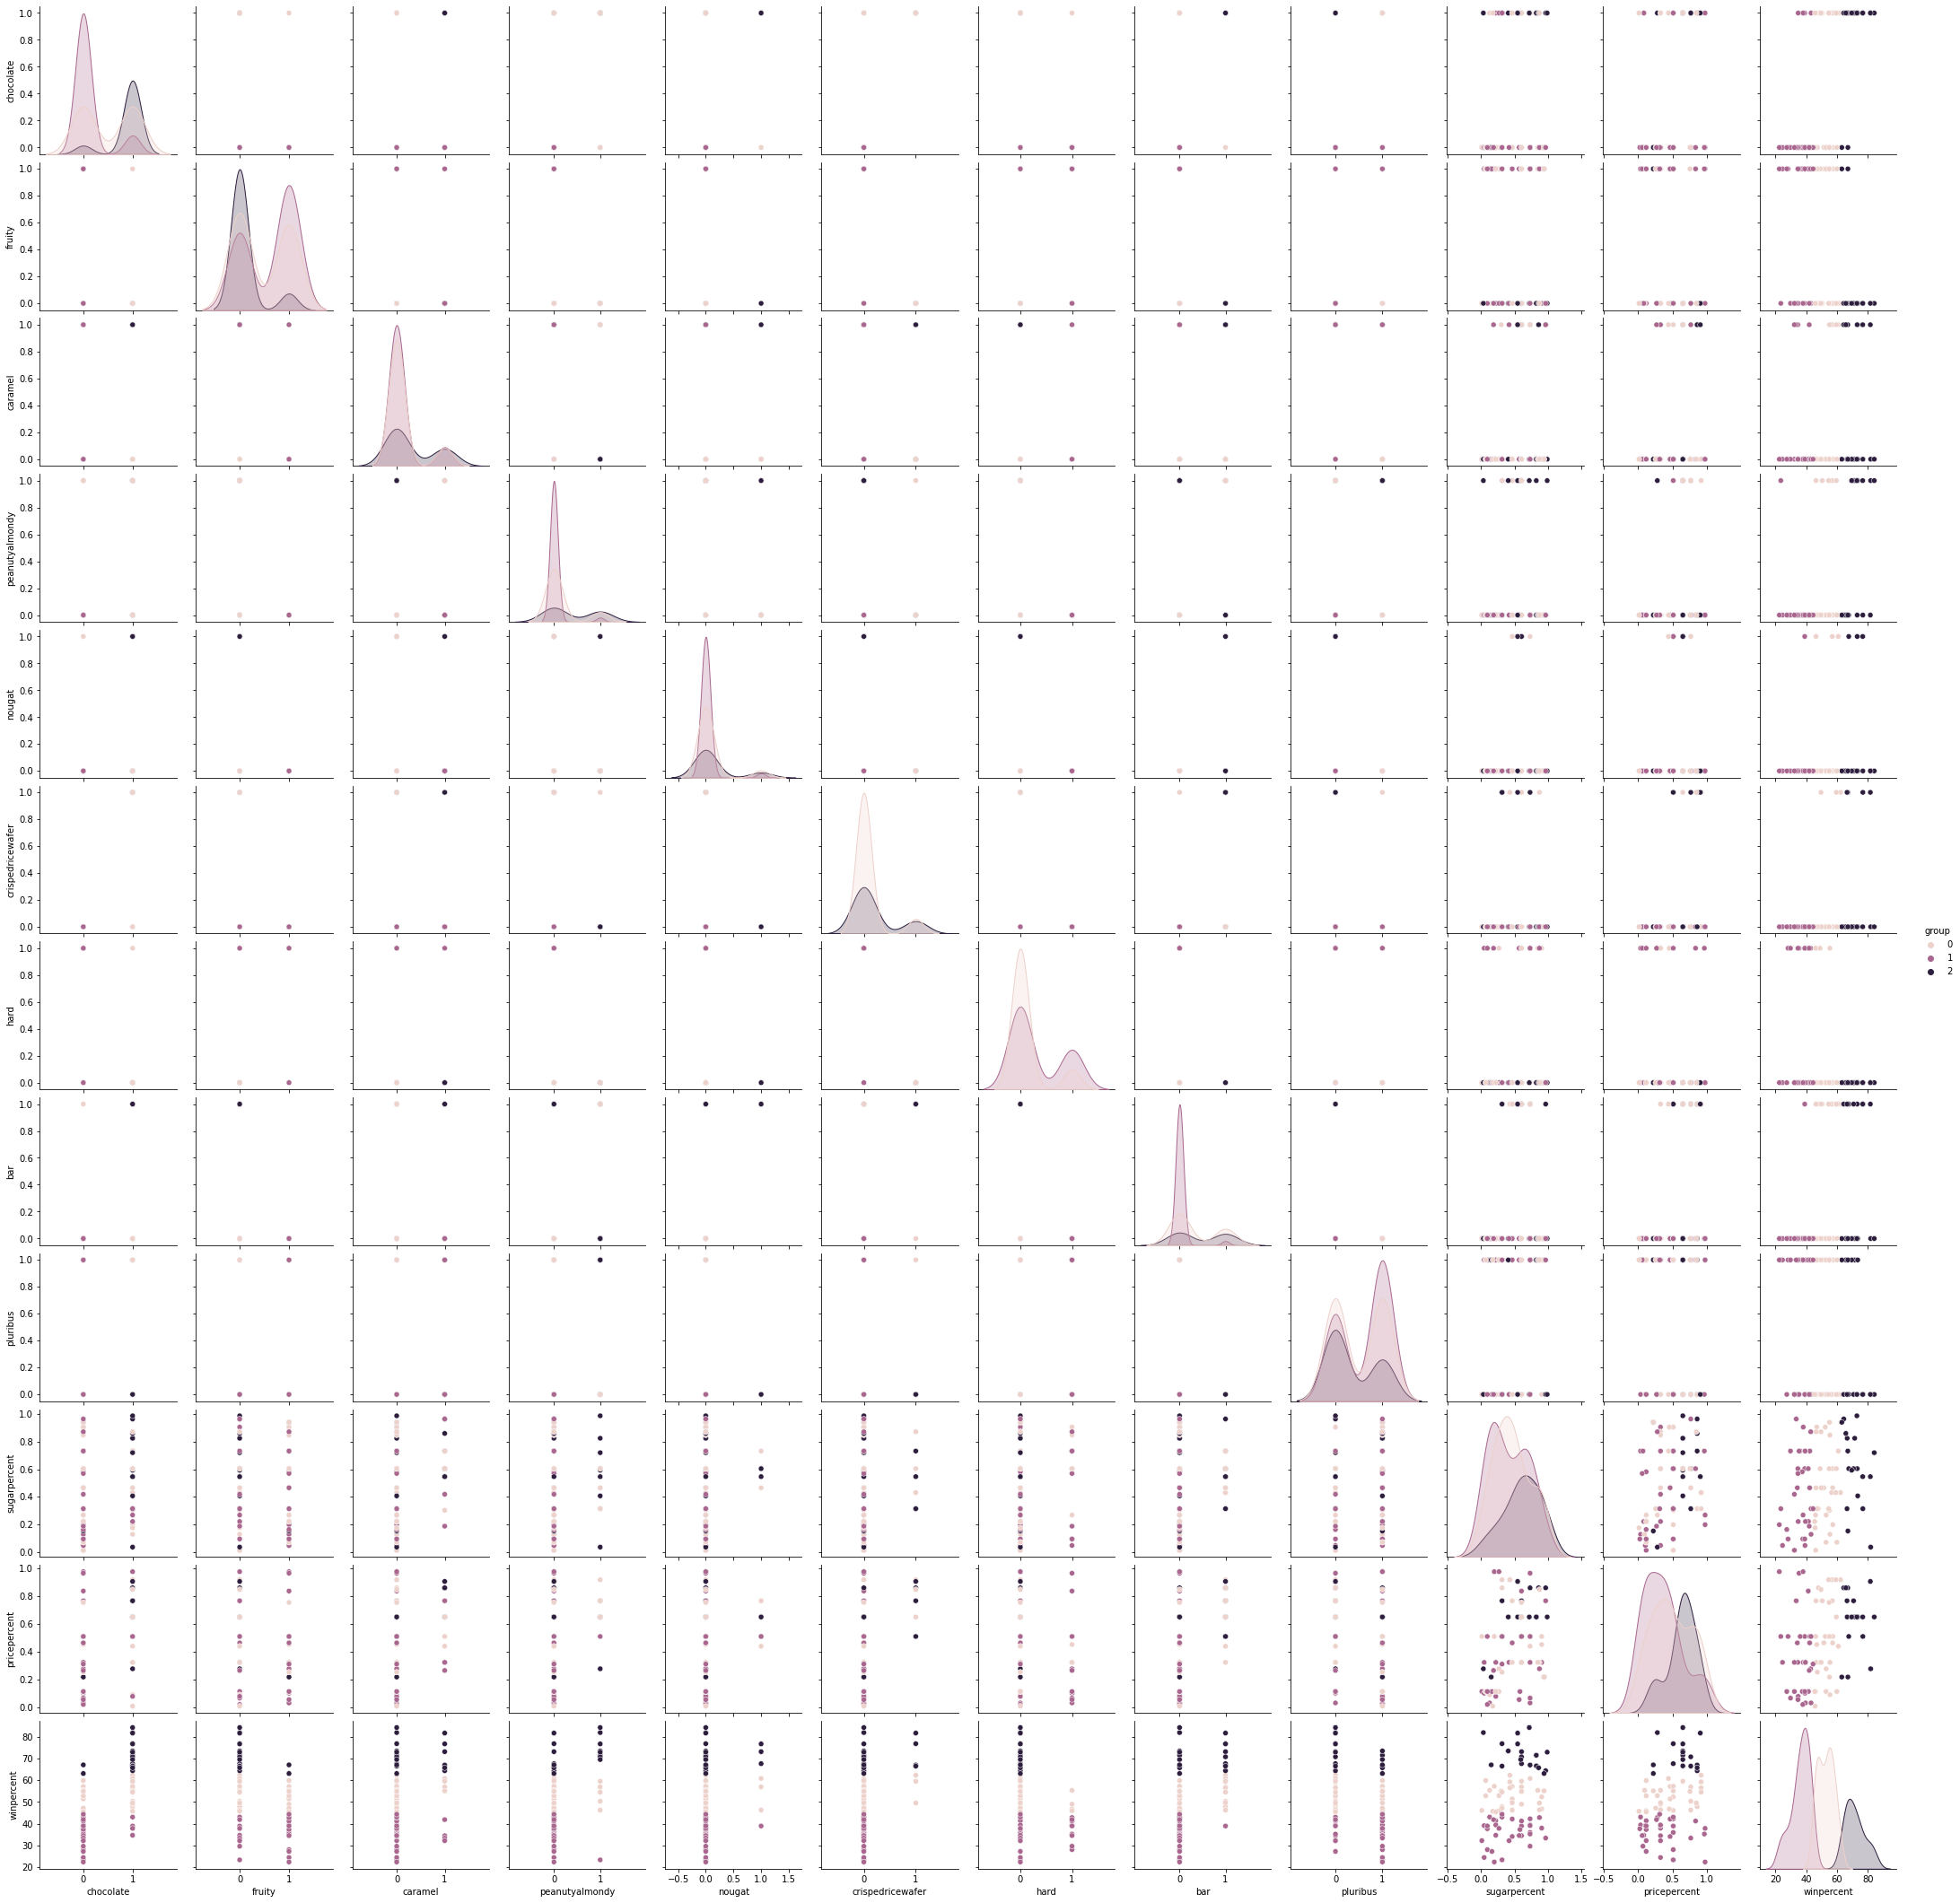

In [ ]:
sns.pairplot(dataset, hue='group')